2.1 Sentiment Analysis of Review Comments

NLTK resources downloaded successfully
Number of reviews with text: 40950 out of 99224 total reviews

Sample of cleaned comments:


C:\Users\Slimane\AppData\Local\Temp\ipykernel_43060\454852396.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_with_text['cleaned_comment'] = reviews_with_text['review_comment_message'].apply(clean_text)


,review_score,review_comment_message,cleaned_comment
3,5,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado
4,5,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
9,4,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente no site a marca do aparelho...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",mas um pouco travandopelo valor ta boa
15,5,"Vendedor confiável, produto ok e entrega antes...",vendedor confiável produto ok e entrega antes ...


C:\Users\Slimane\AppData\Local\Temp\ipykernel_43060\454852396.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_with_text['sentiment_score'] = reviews_with_text['review_comment_message'].apply(get_sentiment)


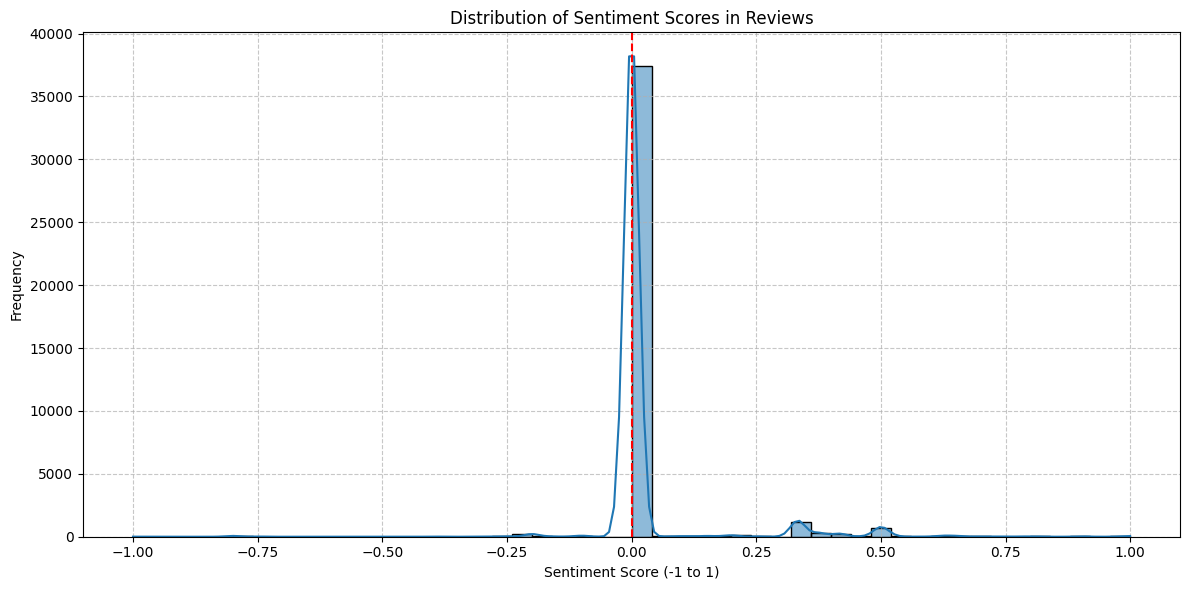

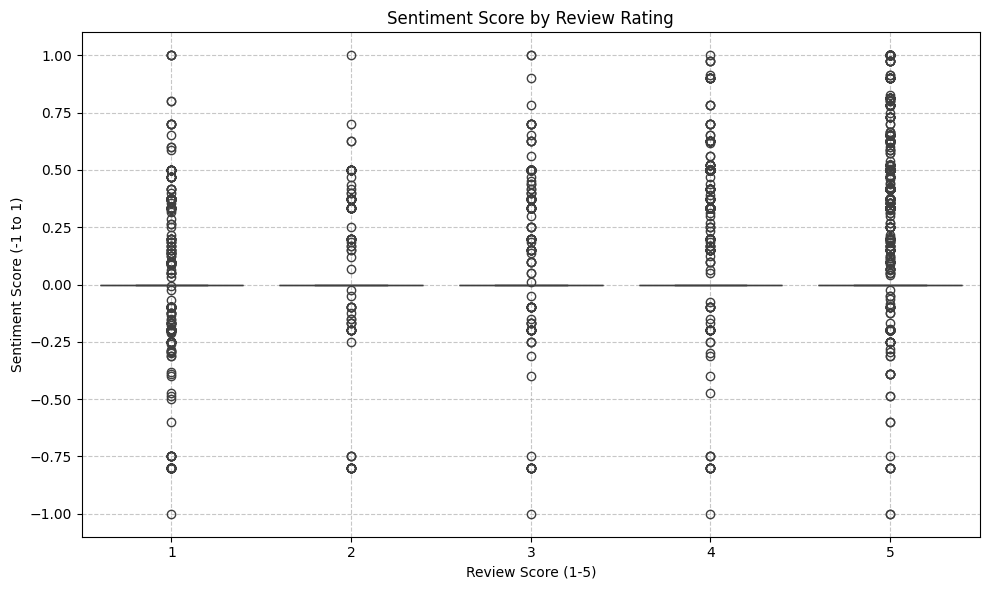


Average sentiment score by review rating:


,review_score,sentiment_score
0,1,0.003046
1,2,0.006660
2,3,0.016321
3,4,0.027230
4,5,0.041581


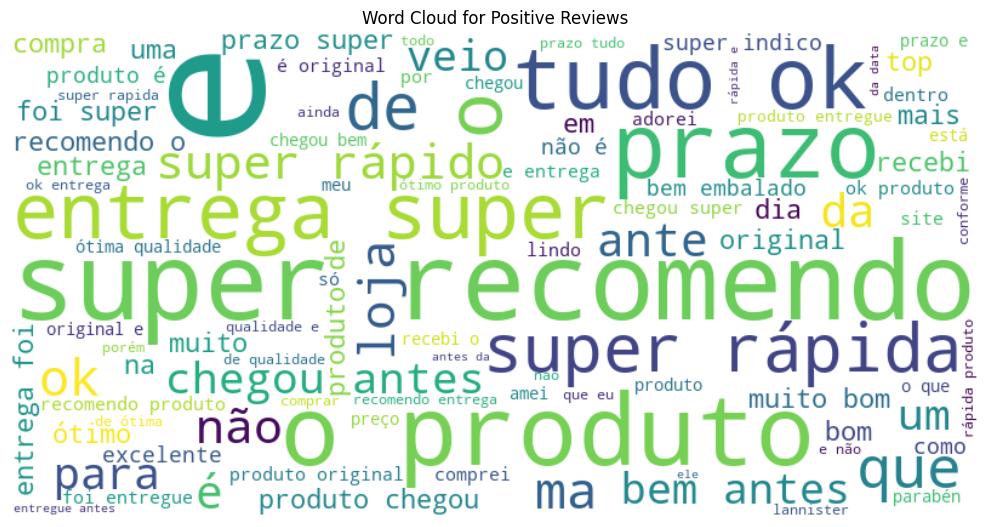

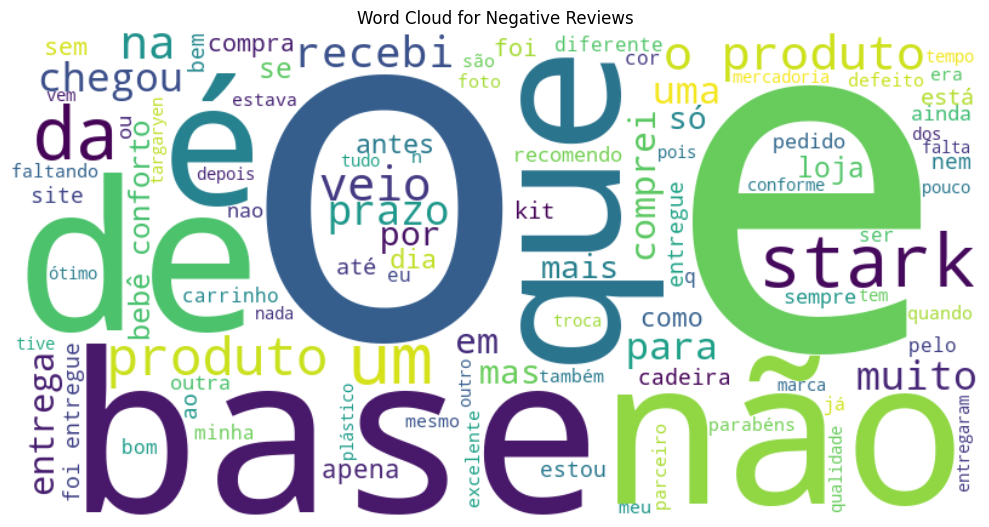


LDA Topics in Reviews:


,Topic,Top Words
0,0,prazo muito antes produto bom chegou entrega b...
1,1,produto recomendo ótimo qualidade super tudo e...
2,2,entrega produto não até para que rápida dia re...
3,3,que não produto com um veio mas da muito eu
4,4,não que produto recebi foi ainda em entregue u...



Topic distribution by review score (%):


C:\Users\Slimane\AppData\Local\Temp\ipykernel_43060\454852396.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_with_text['dominant_topic'] = review_topics.argmax(axis=1)


dominant_topic,0,1,2,3,4
review_score,,,,,
1,2.150046,2.333028,30.043458,30.866880,34.606587
2,5.734266,4.568765,20.372960,38.974359,30.349650
3,15.579303,8.098988,13.076490,35.320585,27.924634
4,38.207705,18.760469,8.743719,19.715243,14.572864
5,49.009009,27.767227,8.341855,8.171415,6.710494


<Figure size 1200x800 with 0 Axes>

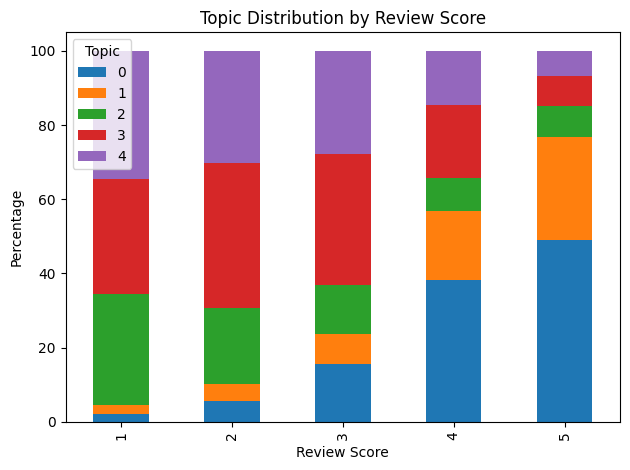


Sentiment analysis complete.


In [7]:
# Import libraries for text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    print("NLTK resources downloaded successfully")
except:
    print("NLTK download failed, proceeding with available resources")

reviews = pd.read_csv(r'C:\Users\Slimane\prog\Analytics\Brazilian E-Commerce\data\olist_order_reviews_dataset.csv')

# Load reviews data
reviews['review_comment_message'] = reviews['review_comment_message'].fillna('')

# Filter out empty comments
reviews_with_text = reviews[reviews['review_comment_message'].str.strip() != '']
print(f"Number of reviews with text: {len(reviews_with_text)} out of {len(reviews)} total reviews")

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
reviews_with_text['cleaned_comment'] = reviews_with_text['review_comment_message'].apply(clean_text)

# Display sample of cleaned comments
print("\nSample of cleaned comments:")
display(reviews_with_text[['review_score', 'review_comment_message', 'cleaned_comment']].head())

# Sentiment analysis using TextBlob
def get_sentiment(text):
    if not text:
        return 0
    return TextBlob(text).sentiment.polarity


# Apply sentiment analysis
reviews_with_text['sentiment_score'] = reviews_with_text['review_comment_message'].apply(get_sentiment)

# Analyze sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(reviews_with_text['sentiment_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores in Reviews')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compare sentiment scores with review scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='sentiment_score', data=reviews_with_text)
plt.title('Sentiment Score by Review Rating')
plt.xlabel('Review Score (1-5)')
plt.ylabel('Sentiment Score (-1 to 1)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate average sentiment by review score
sentiment_by_score = reviews_with_text.groupby('review_score')['sentiment_score'].mean().reset_index()
print("\nAverage sentiment score by review rating:")
display(sentiment_by_score)

# Create word clouds for positive and negative reviews
positive_reviews = reviews_with_text[reviews_with_text['sentiment_score'] > 0.2]['cleaned_comment']
negative_reviews = reviews_with_text[reviews_with_text['sentiment_score'] < -0.2]['cleaned_comment']

# Function to generate word cloud
def generate_wordcloud(text_series, title):
    if len(text_series) == 0:
        print(f"No text available for {title}")
        return
    
    text = ' '.join(text_series)
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        contour_width=3,
        contour_color='steelblue'
    ).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word clouds
generate_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')

# Topic modeling with Latent Dirichlet Allocation (LDA)
# Prepare the data
vectorizer = CountVectorizer(
    max_features=1000,
    stop_words='english',
    min_df=5
)

# Create document-term matrix
dtm = vectorizer.fit_transform(reviews_with_text['cleaned_comment'])
feature_names = vectorizer.get_feature_names_out()

# Build LDA model
n_topics = 5
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=10
)

lda_model.fit(dtm)

# Function to display topics
def display_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append((topic_idx, ' '.join(top_words)))
    
    return pd.DataFrame(topics, columns=['Topic', 'Top Words'])

# Display topics
topics_df = display_topics(lda_model, feature_names, 10)
print("\nLDA Topics in Reviews:")
display(topics_df)

# Assign topics to reviews
review_topics = lda_model.transform(dtm)
reviews_with_text['dominant_topic'] = review_topics.argmax(axis=1)

# Analyze topics by review score
topic_by_score = pd.crosstab(
    reviews_with_text['review_score'], 
    reviews_with_text['dominant_topic'],
    normalize='index'
) * 100

print("\nTopic distribution by review score (%):")
display(topic_by_score)

# Visualize topic distribution by review score
plt.figure(figsize=(12, 8))
topic_by_score.plot(kind='bar', stacked=True)
plt.title('Topic Distribution by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Percentage')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()

print("\nSentiment analysis complete.")

2.2 Product Description Analysis

In [ ]:
# Load product descriptions
products = pd.read_csv('./data/olist_products_dataset.csv')
order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
orders = pd.read_csv('./data/olist_orders_dataset.csv')
products['product_description_length'] = products['product_description_length'].fillna(0)

# Analyze product description length distribution
plt.figure(figsize=(12, 6))
sns.histplot(products['product_description_length'], bins=50, kde=True)
plt.title('Distribution of Product Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.xlim(0, products['product_description_length'].quantile(0.95))  # Limit to 95th percentile
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze relationship between description length and product performance
product_performance = order_items.merge(products[['product_id', 'product_description_length']], on='product_id')
product_performance = product_performance.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id')

# Group by product and calculate metrics
product_metrics = product_performance.groupby('product_id').agg({
    'order_id': 'count',  # Number of orders
    'price': 'mean',      # Average price
    'product_description_length': 'first'  # Description length
}).reset_index()

# Create description length bins
product_metrics['description_length_bin'] = pd.cut(
    product_metrics['product_description_length'],
    bins=[0, 100, 500, 1000, 5000, float('inf')],
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

# Analyze sales by description length
sales_by_desc_length = product_metrics.groupby('description_length_bin').agg({
    'product_id': 'count',
    'order_id': ['sum', 'mean'],
    'price': 'mean'
}).reset_index()

# Flatten multi-level columns
sales_by_desc_length.columns = ['description_length_bin', 'product_count', 'total_orders', 'avg_orders_per_product', 'avg_price']

print("\nSales metrics by description length:")
display(sales_by_desc_length)

# Visualize relationship between description length and sales
plt.figure(figsize=(12, 6))
sns.barplot(x='description_length_bin', y='avg_orders_per_product', data=sales_by_desc_length, palette='viridis')
plt.title('Average Orders per Product by Description Length')
plt.xlabel('Description Length')
plt.ylabel('Average Orders per Product')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nProduct description analysis complete.")

FileNotFoundError: [Errno 2] No such file or directory: 'data/olist_products_dataset.csv'